In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from numpy.polynomial.polynomial import polyfit
# from sklearn.linear_model import LinearRegression
import seaborn as sns
# import statsmodels.stats.tests.test_influence
# from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import math

___Prepare a prediction model for profit of 50_startups data___  

* ___Do transformations for getting better predictions of profit and___  
___make a table containing R^2 value for each prepared model.___

## Data collection and description

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df1["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
df1.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


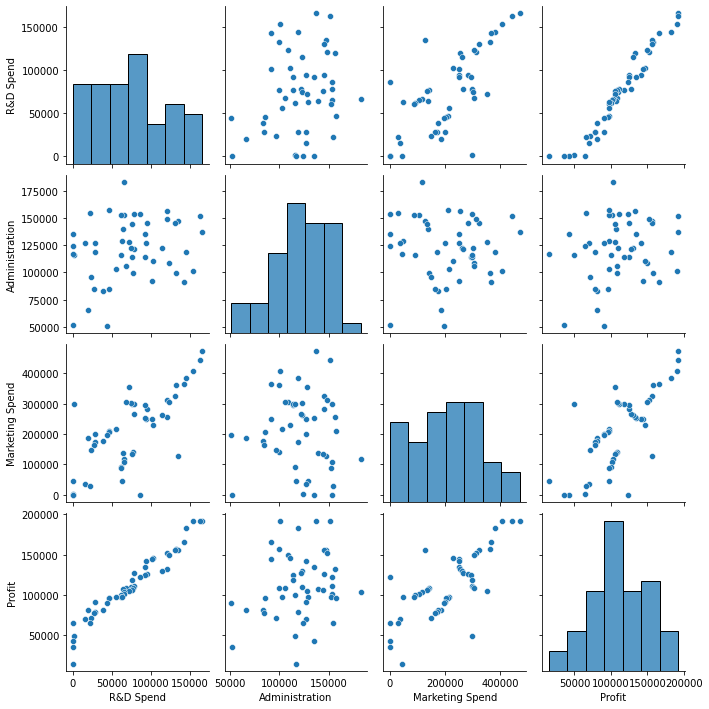

In [10]:
sns.pairplot(df1)

## __Correlation Matrix__ 

In [11]:
corrMatrix = df1.corr()

In [12]:
corrMatrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

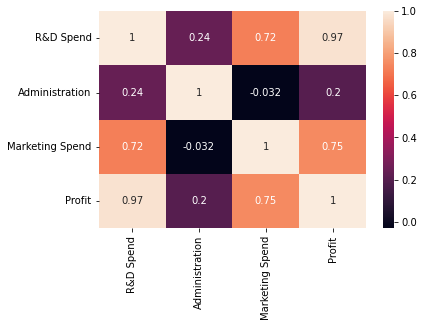

In [13]:
sns.heatmap(corrMatrix, annot=True)

## __Regression Model__ 

In [14]:
df1 = pd.get_dummies(df1, columns=['State'])

In [15]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
X = df1[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
Y = df1[['Profit']]

In [17]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.34e-27
Time:                        19:37:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

## __Solving Multicollinearity__ 

### __1. Finding Cook's Distance__ 

In [19]:
infl = model.get_influence()

In [20]:
summ_df = infl.summary_frame()

In [21]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


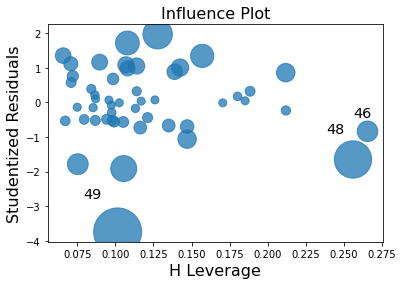

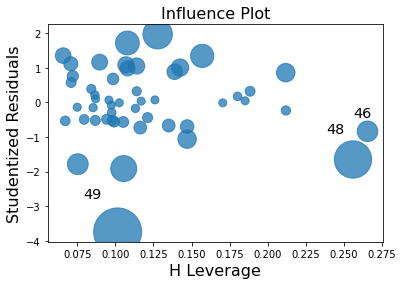

In [22]:
infl.plot_influence()

#### Index 48 and 49 has highest Cook's Distance  
Thus it will be wise to drop this row from the data set

### __2 - Finding Variance Inflation Factor (VIF)__ 

In [23]:
vif = pd.DataFrame()

In [24]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [25]:
vif["features"] = X.columns

In [26]:
vif.round(1)

,VIF Factor,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


In [27]:
# X = np.array(df1)
# vif = pd.DataFrame()
# vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
# print(vif)
# X=pd.DataFrame()

#### As expected, Administration has the lowest variance inflation factor, we would need to discard this variables to improve model and try to solve multicolinearity.

In [28]:
# Removed administration fron the dataframe and Test the model
new_X = df1[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]

In [29]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [30]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           9.72e-29
Time:                        19:37:13   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As you can see, once we remove "Administration" from input variables list and run the model again, all the variables are significant.

## __Final Model__ 

In [31]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = df1.drop(df1.index[[49,48]])

In [32]:
new_X = new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
new_Y = new_df[['Profit']]

In [33]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [34]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.02e-29
Time:                        19:37:13   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now even though the Model has acceptable p Value and R sq value, we can still improve the R square value.

### __1 - Sq Root Transformation of X__ 

In [43]:
X_sqrt = np.sqrt(new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']])

In [44]:
model1 = sm.OLS(new_Y, X_sqrt).fit()
predictions1 = model1.predict(X_sqrt)

In [45]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     84.44
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           8.67e-20
Time:                        19:43:27   Log-Likelihood:                -519.91
No. Observations:                  48   AIC:                             1050.
Df Residuals:                      43   BIC:                             1059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          340.5455     25.777     13.211      0.000     288.560     392.531
Marketing Spend     20.0497     15.481      1.295      0.202     -11.170      51.270
State_California  1.836e+04   6267.224      2.930      0.005    5724.219     3.1e+04
State_Florida     1.692e+04   7013.669      2.413      0.020    2779.320    3.11e+04
State_New York    1.908e+04   6591.247      2.894      0.006    5782.772    3.24e+04
==============================================================================
Omnibus:                        7.588   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.161
Skew:                           0.941   Prob(JB):                       0.0279
Kurtosis:                       3.197   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### __2 - Square Root Transformation of Y__ 

In [46]:
Y_sqrt = np.sqrt(new_df['Profit'])

In [47]:
model2 = sm.OLS(Y_sqrt, new_X).fit()
predictions2 = model2.predict(new_X)

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.68e-28
Time:                        19:43:29   Log-Likelihood:                -185.87
No. Observations:                  48   AIC:                             381.7
Df Residuals:                      43   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   5.64e-05     20.622      0.000       0.001       0.001
Marketing Spend   2.473e-05   2.13e-05      1.159      0.253   -1.83e-05    6.78e-05
State_California   241.0032      4.390     54.894      0.000     232.149     249.857
State_Florida      240.7325      4.986     48.283      0.000     230.678     250.787
State_New York     240.9886      4.756     50.669      0.000     231.397     250.580
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.371
Skew:                          -0.532   Prob(JB):                        0.185
Kurtosis:                       3.745   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### __3 - Square Root Transformation of X & Y__ 

In [49]:
model3 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions3= model3.predict(X_sqrt)

In [50]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.64e-24
Time:                        19:43:30   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## __Output Interpretation__ 

We will use Final Model as it has the best R square value

p-value < 0.05  
Thus the model is accepted